The data used here can be found from Kaggle, and pose the question of accessibility of farmers markets in the US. 

https://www.kaggle.com/madeleineferguson/farmers-markets-in-the-united-states

Two data sets are used.  A farmers market set includes data on farmers markets by county, including market names and food offerings.  The county data set includes more general demographic information like population and incomes.

In [2]:
# import packages
import pandas as pd
import numpy as np
import random as rnd
#from tabulate import tabulate

# Visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
#import plotly as py
#import plotly.express as px
#import plotly.graph_objects as go

### Exploring and Cleaning the Data

In [3]:
#read the data files and save as dataframes
fm_df = pd.read_csv("farmers_markets_from_usda.csv")
co_df = pd.read_csv("wiki_county_info.csv")

In [4]:
fm_df.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,County,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/2017 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/2017 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,Pickens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/2014 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/2012 10:38


In [5]:
co_df.head()

,number,county,State,per capita income,median household income,median family income,population,number of households
0,1,New York County,New York,"$62,498","$69,659","$84,627","1,605,272","736,192"
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244","214,861","94,454"
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857","12,731","5,020"
3,4,Marin,California,"$56,791","$90,839","$117,357","254,643","102,912"
4,5,Alexandria City,Virginia,"$54,608","$85,706","$107,511","143,684","65,369"


In [6]:
# number of rows and columns for both data sets
fm_rows = fm_df.shape[0]
fm_cols = fm_df.shape[1]
print ('The farmers market dataset has {} rows, and {} columns.'.format(fm_rows, fm_cols))

co_rows = co_df.shape[0]
co_cols = co_df.shape[1]
print ('The us county dataset has {} rows, and {} columns.'.format(co_rows, co_cols))

The farmers market dataset has 8804 rows, and 59 columns.
The us county dataset has 3233 rows, and 8 columns.


In [7]:
# columns that have no missing values for both data sets
fm_no_nulls = set(fm_df.columns[fm_df.isnull().mean()==0])
print(fm_no_nulls)
co_no_nulls = set(co_df.columns[co_df.isnull().mean()==0])
print(co_no_nulls)

{'Credit', 'WICcash', 'FMID', 'State', 'updateTime', 'MarketName', 'WIC', 'SNAP', 'SFMNP', 'Organic'}
{'per capita income'}


Is number a unique identifier for each data set?

In [8]:
co_df['number'].nunique()

3146

In [9]:
co_df['number'].describe()


count     3230
unique    3146
top          —
freq        85
Name: number, dtype: object

In [10]:
#co_df['number'] = co_df['number'].astype('int64')

In [11]:
co_df['number'].value_counts()

—       85
1357     1
2368     1
529      1
241      1
        ..
261      1
1198     1
1645     1
3008     1
2530     1
Name: number, Length: 3146, dtype: int64

In [12]:
# to type (long dash) — use [Alt] + 0151, the object is not a regular - (dash)
co_df.loc[co_df['number'] == '—']

,number,county,State,per capita income,median household income,median family income,population,number of households
901,—,Saint John,U.S. Virgin Islands,"$25,730","$40,644","$50,592","4,170","1,894"
1221,—,Guaynabo,Puerto Rico,"$24,264","$34,060","$43,081","97,924","32,913"
1699,—,Saint Thomas,U.S. Virgin Islands,"$22,458","$38,232","$47,122","51,634","21,555"
2369,—,Saint Croix,U.S. Virgin Islands,"$19,883","$36,042","$41,959","50,601","19,765"
2750,—,San Juan,Puerto Rico,"$18,160","$21,677","$27,916","395,326","145,321"
...,...,...,...,...,...,...,...,...
3228,—,Guanica,Puerto Rico,"$7,207","$12,653","$14,029","19,427","5,528"
3229,—,Jayuya,Puerto Rico,"$7,179","$15,615","$19,955","16,642","4,818"
3230,—,Las Marias,Puerto Rico,"$7,154","$14,404","$19,698","9,881","3,033"
3231,—,Adjuntas,Puerto Rico,"$7,117","$11,680","$13,582","19,483","6,166"


It appears all non numeric values in the number column are US territories, not part of the mainland.  Using only mainland US counties will make it easier to use 'number' as a unique identifier, so these rows will be removed.  

In [13]:
co_df = co_df[co_df.number != '—']
co_df['number'].describe()

count     3145
unique    3145
top       1357
freq         1
Name: number, dtype: object

In [14]:
co_df['number'].nunique()

3145

Now 'number' can be used as a unique identifer in the county data set.  

In [15]:
co_df['number'] = co_df['number'].astype(str)
co_df['number'].describe()

count     3148
unique    3146
top        nan
freq         3
Name: number, dtype: object

In [16]:
co_df['number'].isna().any()
#co_df['number'].isnull().T.any().T.sum()
#co_df.loc[co_df['number'] == '—']

False

In [18]:
#co_df['number'] = pd.to_numeric(co_df['number'])

No, county is not a unique identifier.  There are less unique counties in each data set than total rows.  But it seems as if it should be for the county data set, at least.

In [17]:
co_df['county'].notnull().sum(axis=0)

3143

There are 5 entries for county in the county data set that contain null values.  These should be removed.

In [18]:
co_df['county'].dropna()

0            New York County
1                  Arlington
2          Falls Church City
3                      Marin
4            Alexandria City
                ...         
3163                 Willacy
3164    Kusilvak Census Area
3174                    Todd
3204                 Wheeler
3208           Oglala Lakota
Name: county, Length: 3143, dtype: object

In [19]:
co_df['county'].value_counts()

Washington County    30
Jefferson            26
Franklin             24
Lincoln              24
Jackson              24
                     ..
Hot Spring            1
Monona                1
Broome                1
Travis                1
Cimarron              1
Name: county, Length: 1854, dtype: int64

In [20]:
fm_df['County'].notnull().sum(axis=0)

8768

There are 36 rows in the farmers market dataframe that contain null values for County.  They should be removed.

In [21]:
fm_df['County'].dropna()

0        Caledonia
1         Cuyahoga
2          Pickens
3           Barton
4         New York
           ...    
8799      Sandoval
8800     Sherburne
8801    Washington
8802         Boone
8803        Platte
Name: County, Length: 8768, dtype: object

In [22]:
# Counties with the most farmers markets
top10_counties_fm = fm_df.County.value_counts()[:10]
print(top10_counties_fm)

Los Angeles    128
Cook           111
Jefferson      100
Washington      93
Franklin        87
Middlesex       84
Montgomery      70
Orange          65
Worcester       64
New York        63
Name: County, dtype: int64


In [23]:
fm_co_count = farmers_market_df['County'].nunique()
us_co_count = us_counties_df['county'].nunique()
print("There are {} counties with farmers markets, and {} counties with income data.".format(fm_co_count,us_co_count))

NameError: name 'farmers_market_df' is not defined

In [24]:
# joining the 2 dataframes on the shared column 'State'
state_df = fm_df.set_index('State').join(co_df.set_index('State'))
#state_df.head(2)

In [25]:
# needed to keep 'State' as column, not index
state_df.reset_index(level=0, inplace=True)
state_df.columns

Index(['State', 'FMID', 'MarketName', 'Website', 'Facebook', 'Twitter',
       'Youtube', 'OtherMedia', 'street', 'city', 'County', 'zip',
       'Season1Date', 'Season1Time', 'Season2Date', 'Season2Time',
       'Season3Date', 'Season3Time', 'Season4Date', 'Season4Time', 'x', 'y',
       'Location', 'Credit', 'WIC', 'WICcash', 'SFMNP', 'SNAP', 'Organic',
       'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood', 'Herbs',
       'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nursery', 'Nuts',
       'Plants', 'Poultry', 'Prepared', 'Soap', 'Trees', 'Wine', 'Coffee',
       'Beans', 'Fruits', 'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu',
       'WildHarvested', 'updateTime', 'number', 'county', 'per capita income',
       'median household income', 'median family income', 'population',
       'number of households'],
      dtype='object')

In [26]:
# re-indexing state_df so that 'County' and 'county' row data are consistent
county_df = state_df.loc[state_df['County']==state_df['county']]
county_df.head()

,State,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,city,...,Tofu,WildHarvested,updateTime,number,county,per capita income,median household income,median family income,population,number of households
13,Alabama,1008391,84 west farmers market (Dothan),NaN,NaN,NaN,NaN,NaN,NaN,Dothan,...,N,N,3/15/2014 9:29,1460,Houston,"$23,316","$40,948","$52,214","102,326","39,250"
86,Alabama,1009028,ABBEVILLE FARMERS MARKET,NaN,https://www.facebook.com/pages/Abbeville-Farme...,NaN,NaN,NaN,Kirkland Street,Abbeville,...,NaN,NaN,4/5/2014 19:27,1845,Henry,"$21,924","$41,650","$54,725","17,308","7,001"
137,Alabama,1004086,Alabama Gulf Coast Market,NaN,NaN,NaN,NaN,NaN,22250 Perdido Beach Boulevard,Gulf Shores,...,N,N,1/25/2015 14:33,694,Baldwin,"$26,766","$50,221","$60,864","187,114","73,283"
272,Alabama,1011861,Athens Saturday Market,http://www.athenssaturdaymarket.com,athenssaturdaymarket,@AthensMarket,NaN,"Twitter, Instagram",409 W Green Street,Athens,...,N,N,6/29/2016 11:19,1047,Limestone,"$25,020","$48,619","$57,858","85,264","31,794"
368,Alabama,1002860,Attalla City Farmers Market,NaN,https://www.facebook.com/pages/City-of-Attalla...,NaN,NaN,NaN,3rd St N (Hwy 11) beside Jack's Restaurant,Attalla,...,N,N,8/15/2014 10:29,2293,Etowah,"$20,204","$38,013","$47,259","104,260","40,217"


In [27]:
# obtaining the number of counties that match on having farmers markets with income data
CO_count = county_df['County'].nunique()
c_count = county_df['county'].nunique()
print("There are {} counties with farmers markets, corresponding with {} counties with income data.".format(CO_count, c_count))

There are 1342 counties with farmers markets, corresponding with 1342 counties with income data.


In [28]:
# defining arrays of features to be examined
income_feats = ['per capita income', 'median household income', 'median family income']
population_feats = ['population', 'number of households']
item_feats = ['Organic', 'Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood',
             'Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nuts', 'Plants',
             'Poultry', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans', 'Fruits',
             'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu']
service_feats = ['Organic', 'WildHarvested', 'Prepared', 'Nursery']

In [29]:
# determining index where income columns begin
county_df.columns.get_loc("per capita income")

61

In [30]:
# removing the $ on income columns and converting to numeric type 
county_df[county_df.columns[61:64]] = county_df[county_df.columns[61:64]].replace('[\$,]', '', regex=True).astype(float)

C:\Users\maxgs\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
# a look at summary statistics for income columns
county_df[income_feats].describe()

,per capita income,median household income,median family income
count,8106.000000,8106.000000,8106.000000
mean,27579.534912,53504.990377,65863.957562
std,6796.815982,14207.998886,16718.078897
min,12489.000000,19986.000000,26739.000000
25%,22964.000000,43540.500000,54074.000000
50%,26495.000000,50772.500000,62464.000000
75%,30668.000000,60350.000000,74290.500000
max,62018.000000,122238.000000,139244.000000


In [32]:
# import packages for graphics
import matplotlib.pyplot as plt

#render plotting automatically
%matplotlib inline   

import matplotlib as mpl

#high resolution
mpl.rcParams['figure.dpi'] = 400 

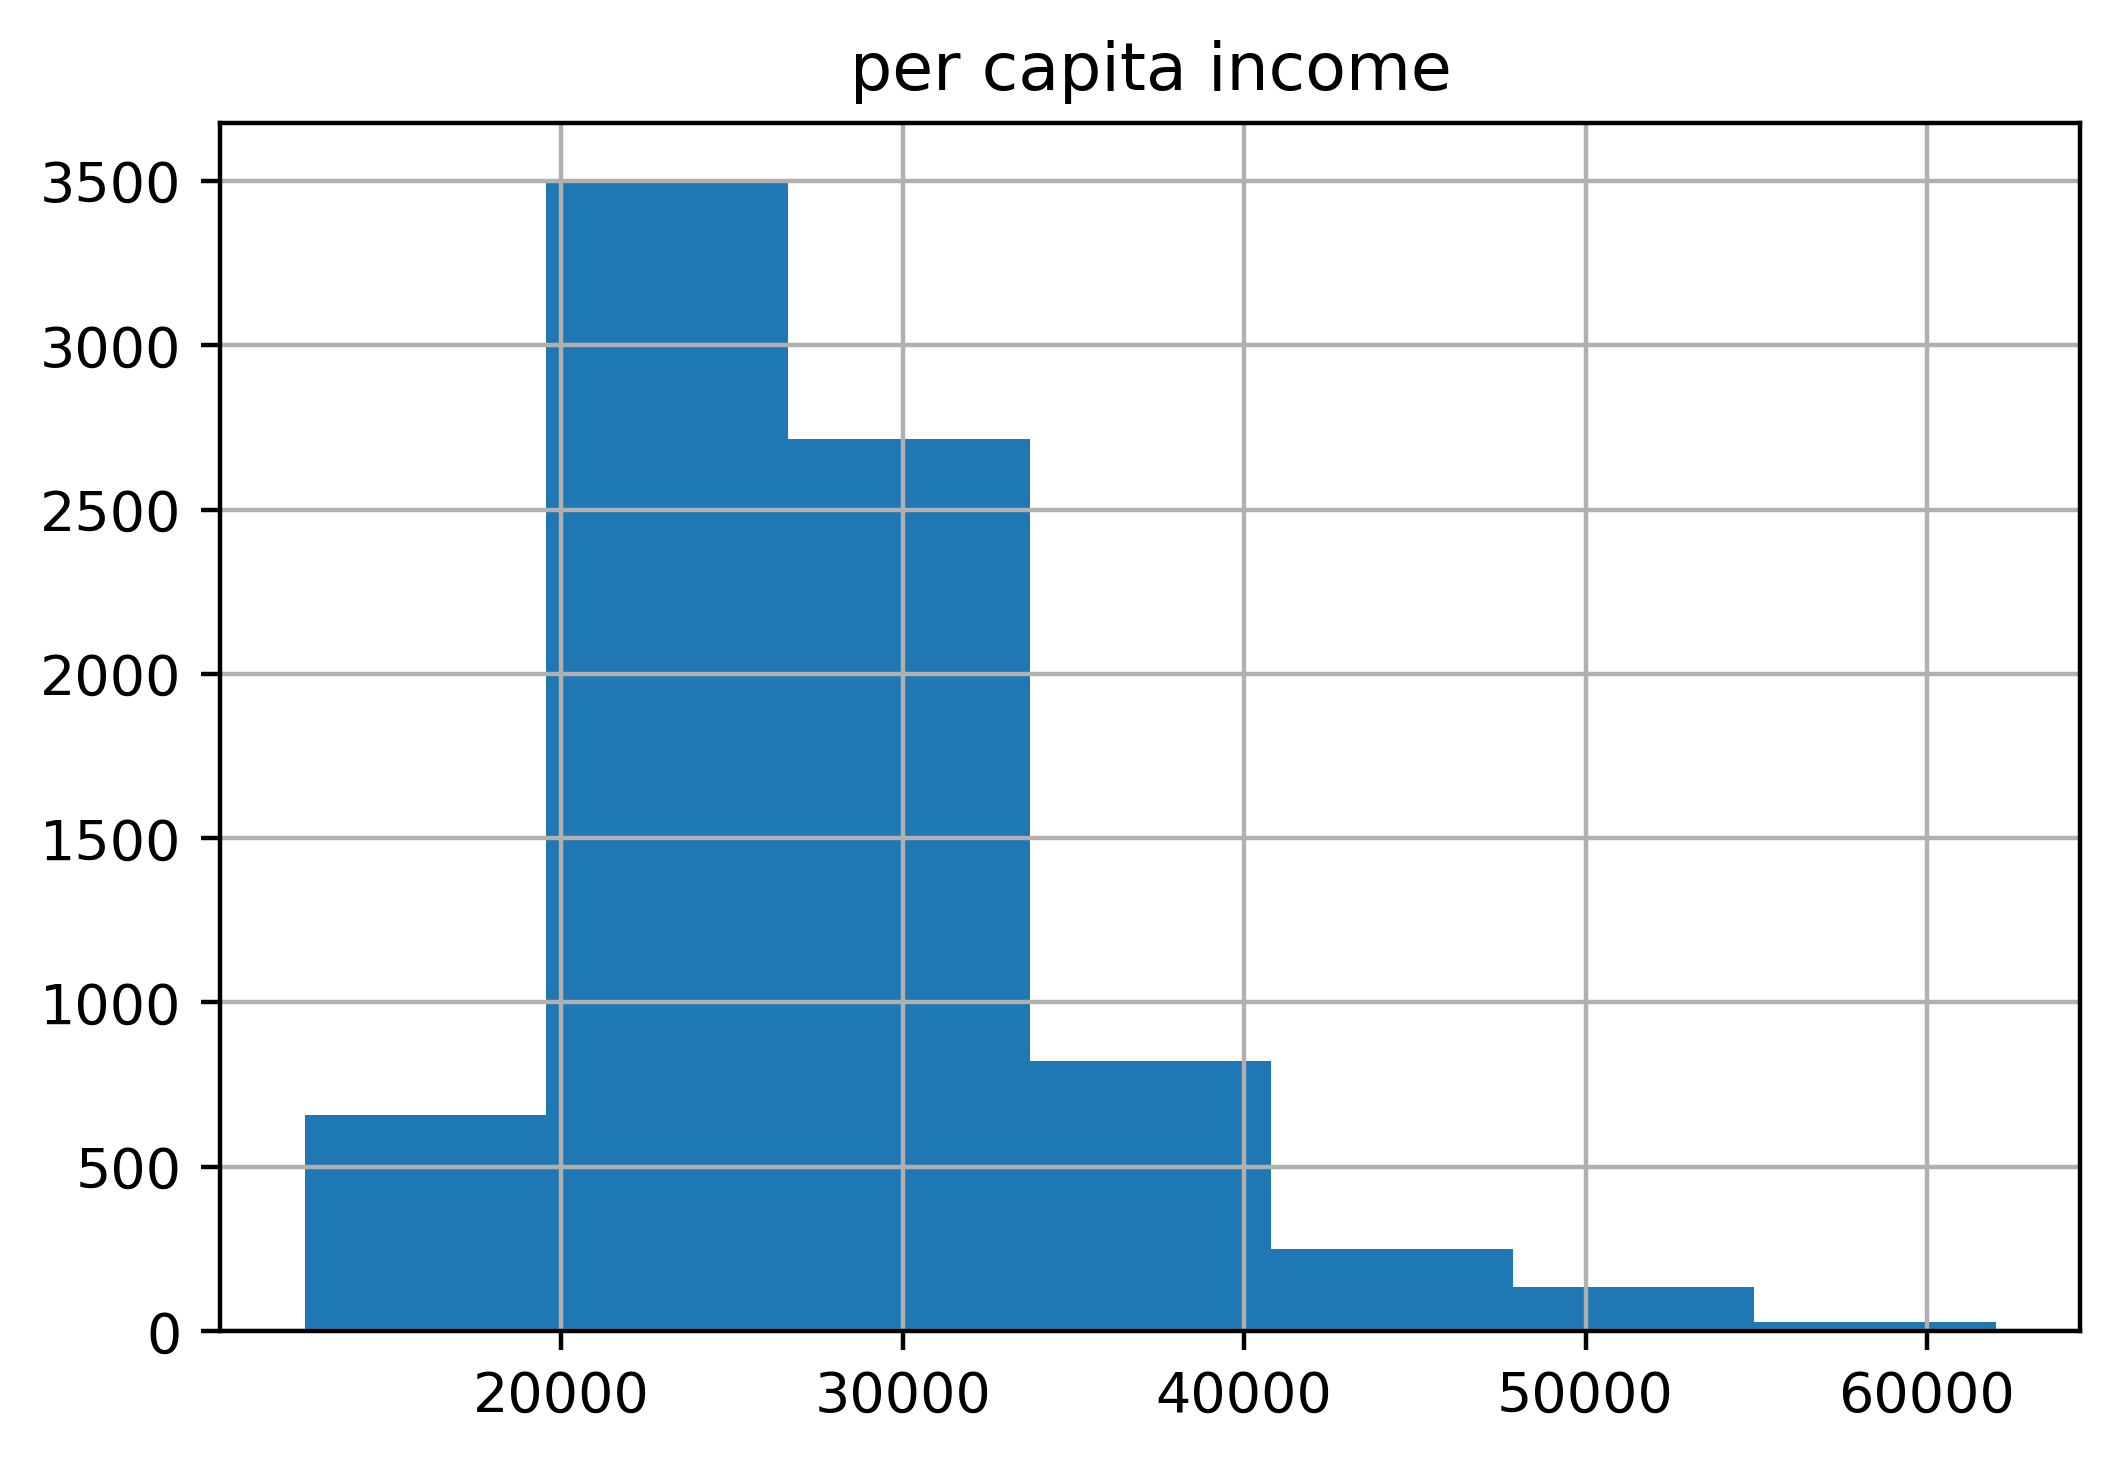

In [33]:
percap_hist = county_df.hist(column='per capita income', bins = 7)

want to plot income vs FMID count per county, state
count FMIDs in each county, state
match with income

In [75]:
# group county and income rows by counts of unique FMIDs
co_group = county_df.groupby(['County', 'per capita income', 'median household income', 'median family income', 'population'])['FMID'].nunique().reset_index()

In [101]:
# had to rename 'FMID' to a more accurate name 'FMID_count'
co_group.rename(columns={'FMID': 'FMID_count'}, inplace=True)
co_group.head()

,County,per capita income,median household income,median family income,population,FMID_count
0,Abbeville,18134.0,35947.0,47211.0,"25,233",2
1,Accomack,22703.0,39328.0,48708.0,"33,289",3
2,Ada,27452.0,55210.0,67641.0,"401,673",7
3,Adair,17371.0,32524.0,45463.0,"18,696",1
4,Adair,19258.0,34733.0,54609.0,"25,573",1


In [127]:
# removing the $ on income columns and converting to numeric type 
co_group['population'] = co_group['population'].replace(',', '', regex=True)
#co_group['population'].astype(int) 

In [132]:
co_group['population'].astype(int).copy()

TypeError: copy() got an unexpected keyword argument 'inplace'

In [131]:
co_group.dtypes

County                      object
per capita income          float64
median household income    float64
median family income       float64
population                  object
FMID_count                 float64
dtype: object

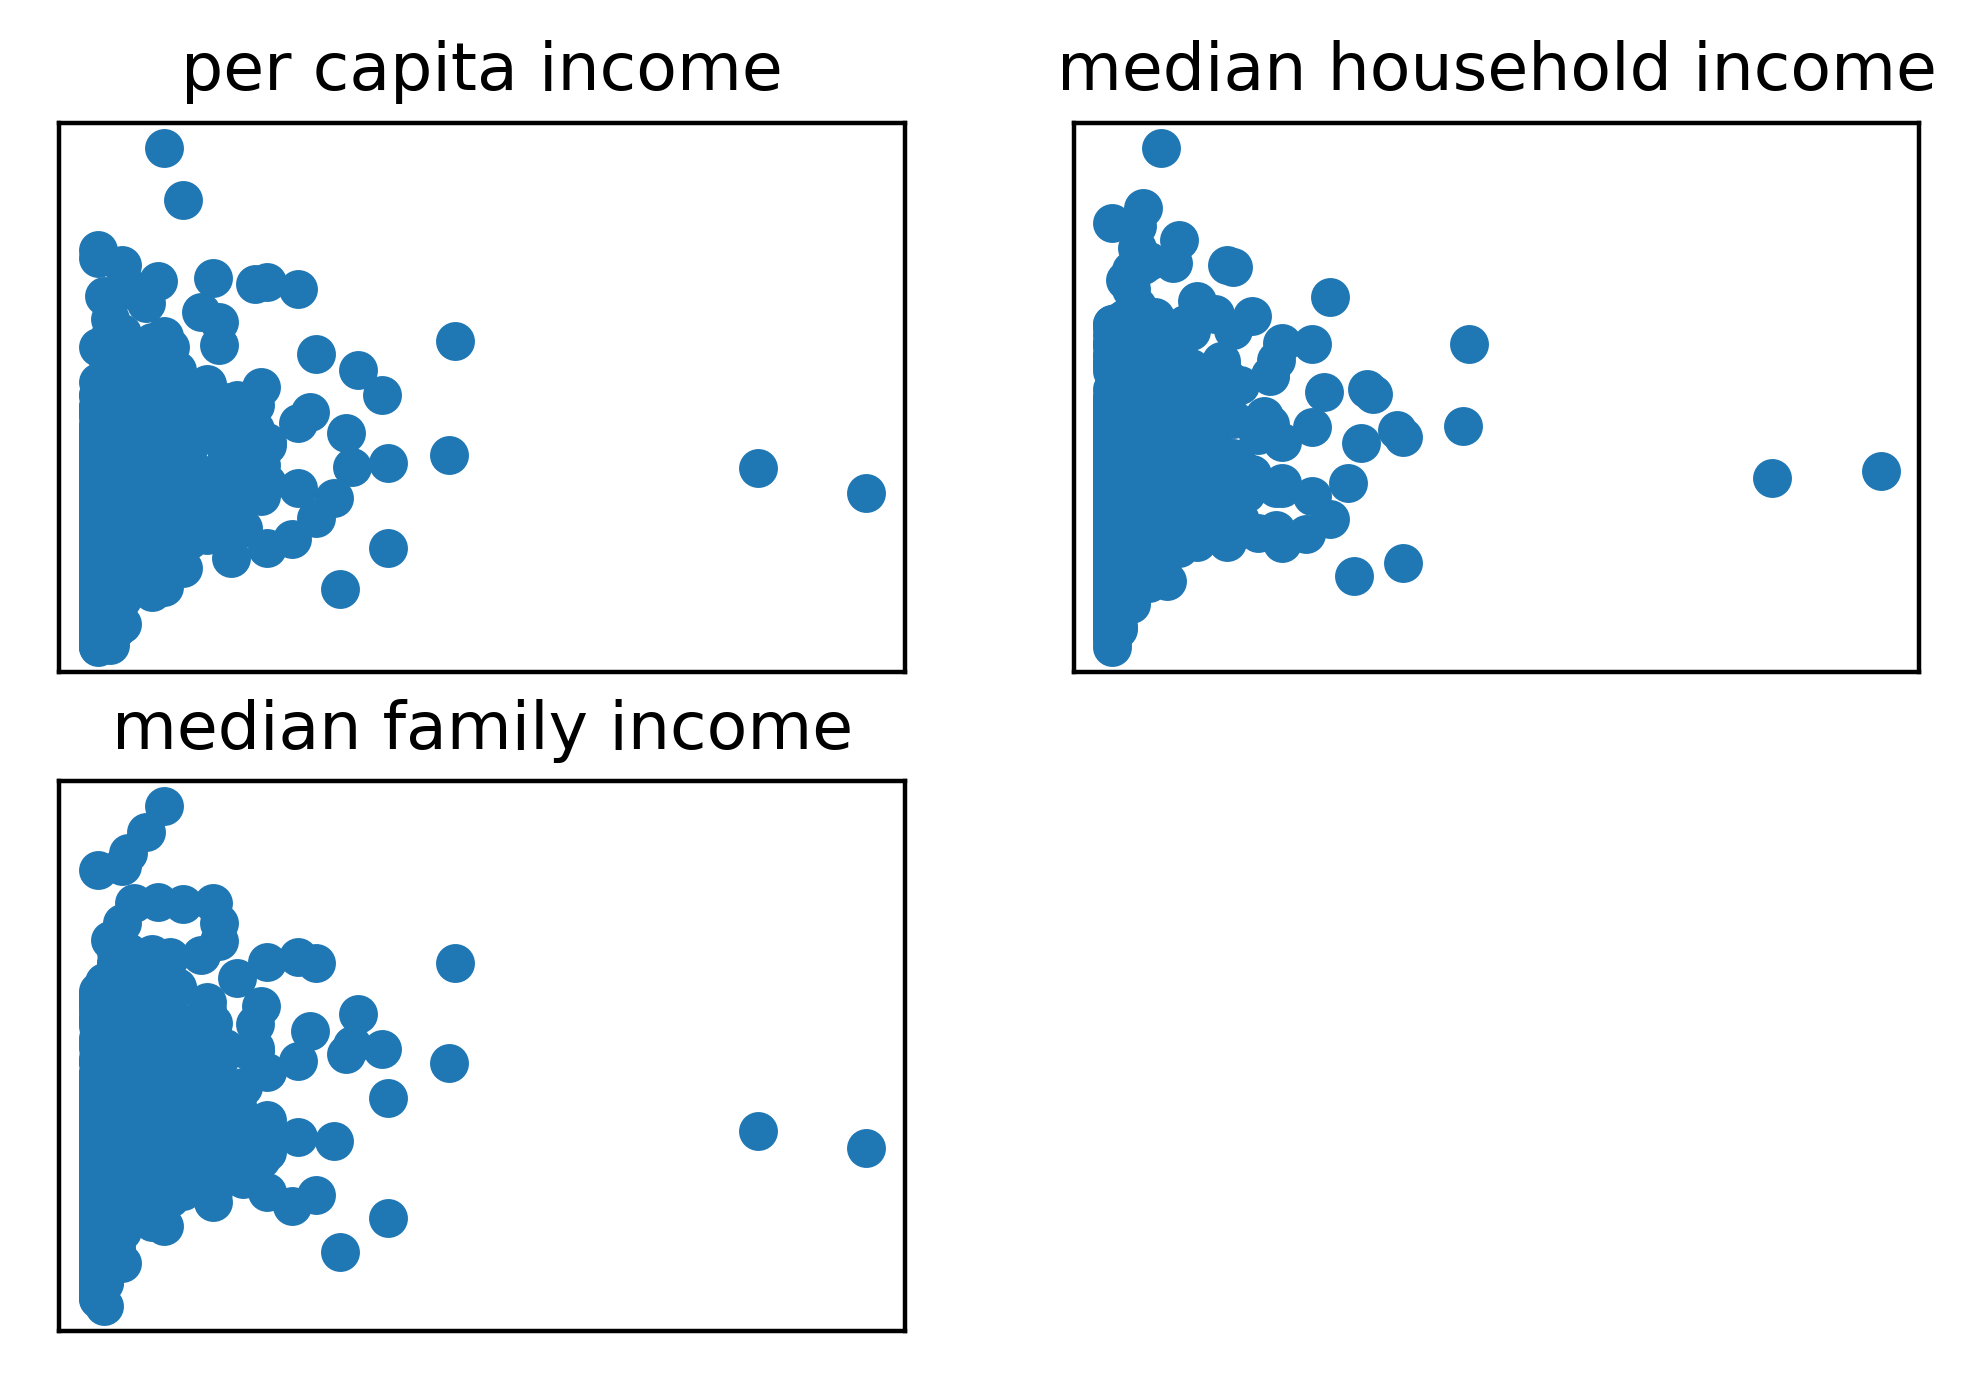

In [66]:
from pylab import *

x = co_group['FMID_count'].to_numpy()
y1 = co_group['per capita income'].to_numpy()
y2 = co_group['median household income'].to_numpy()
y3 = co_group['median family income'].to_numpy()

subplot(2, 2, 1)
xticks([]), yticks([])
title('per capita income')
pci = plt.scatter(x, y1)

subplot(2, 2, 2)
xticks([]), yticks([])
title('median household income')
mhi = plt.scatter(x, y2)

subplot(2, 2, 3)
xticks([]), yticks([])
title('median family income')
mfi = plt.scatter(x, y3)

show()


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = co_group[['per capita income', 'median household income', 'median family income']]
y = co_group['FMID_count']
             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
             
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("The r-squared score for income predicting FMID counts is {}.".format(r2_score(y_test, y_test_preds)))

The r-squared score for income predicting FMID counts is 0.07317626369945363.


This is a very weak correlation for using the 3 measures of income as predictor for FMID counts.

This result is not surprising if we look at 'FMID_count' along the y-axis.  The distributions look normal.  

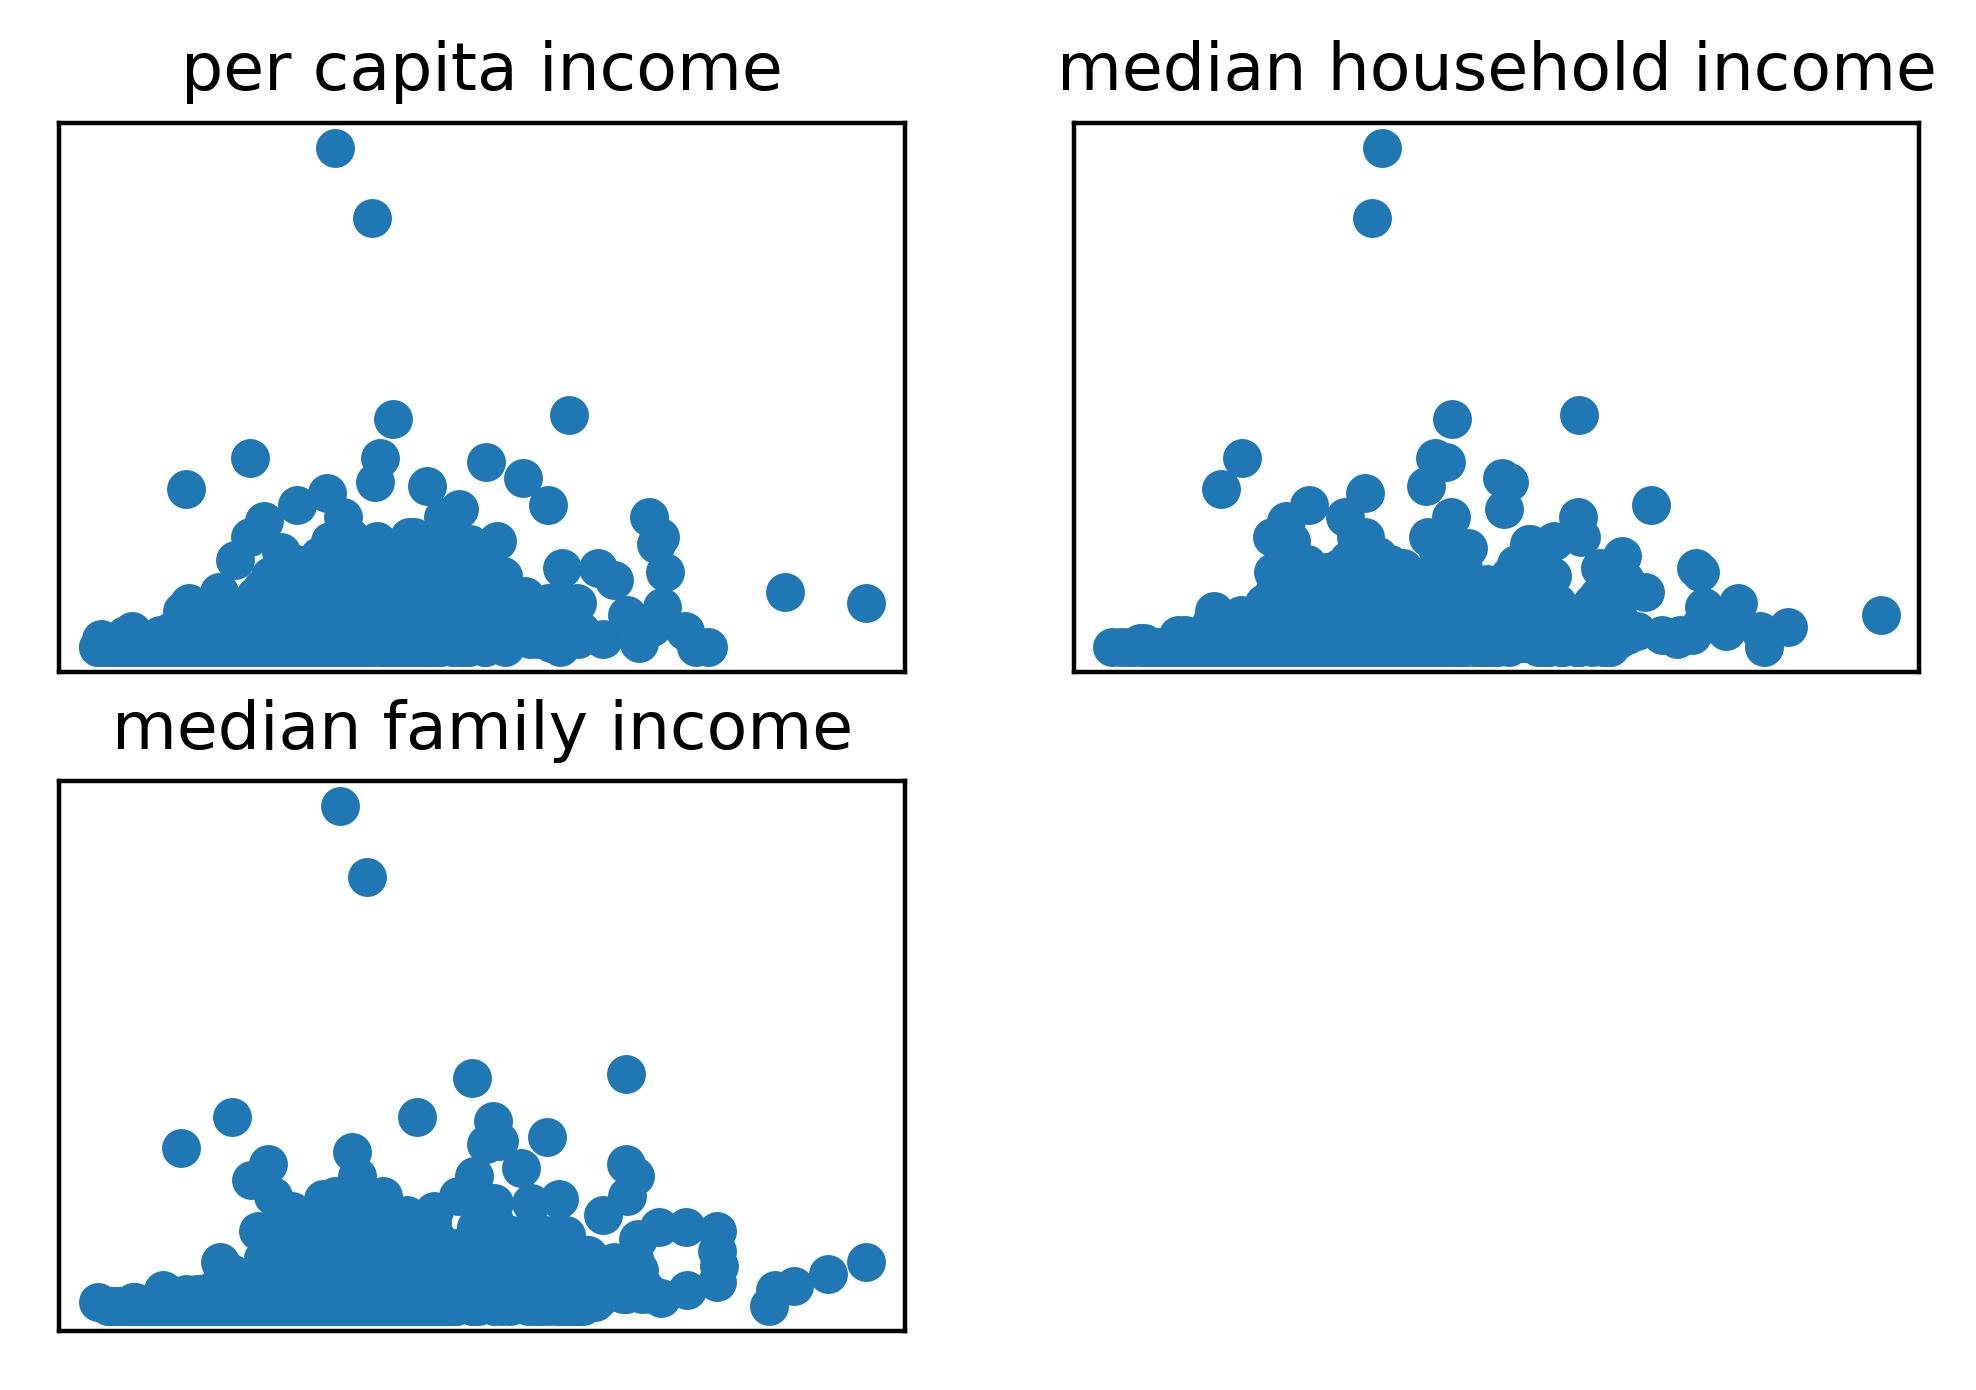

In [74]:
subplot(2, 2, 1)
xticks([]), yticks([])
title('per capita income')
pci = plt.scatter(y1, x)

subplot(2, 2, 2)
xticks([]), yticks([])
title('median household income')
mhi = plt.scatter(y2, x)

subplot(2, 2, 3)
xticks([]), yticks([])
title('median family income')
mfi = plt.scatter(y3, x)

show()

We can conlude that income, regardless of how it's measured in this data set, is not a good indicator of how many farmers markets are in a given county.

How about population?

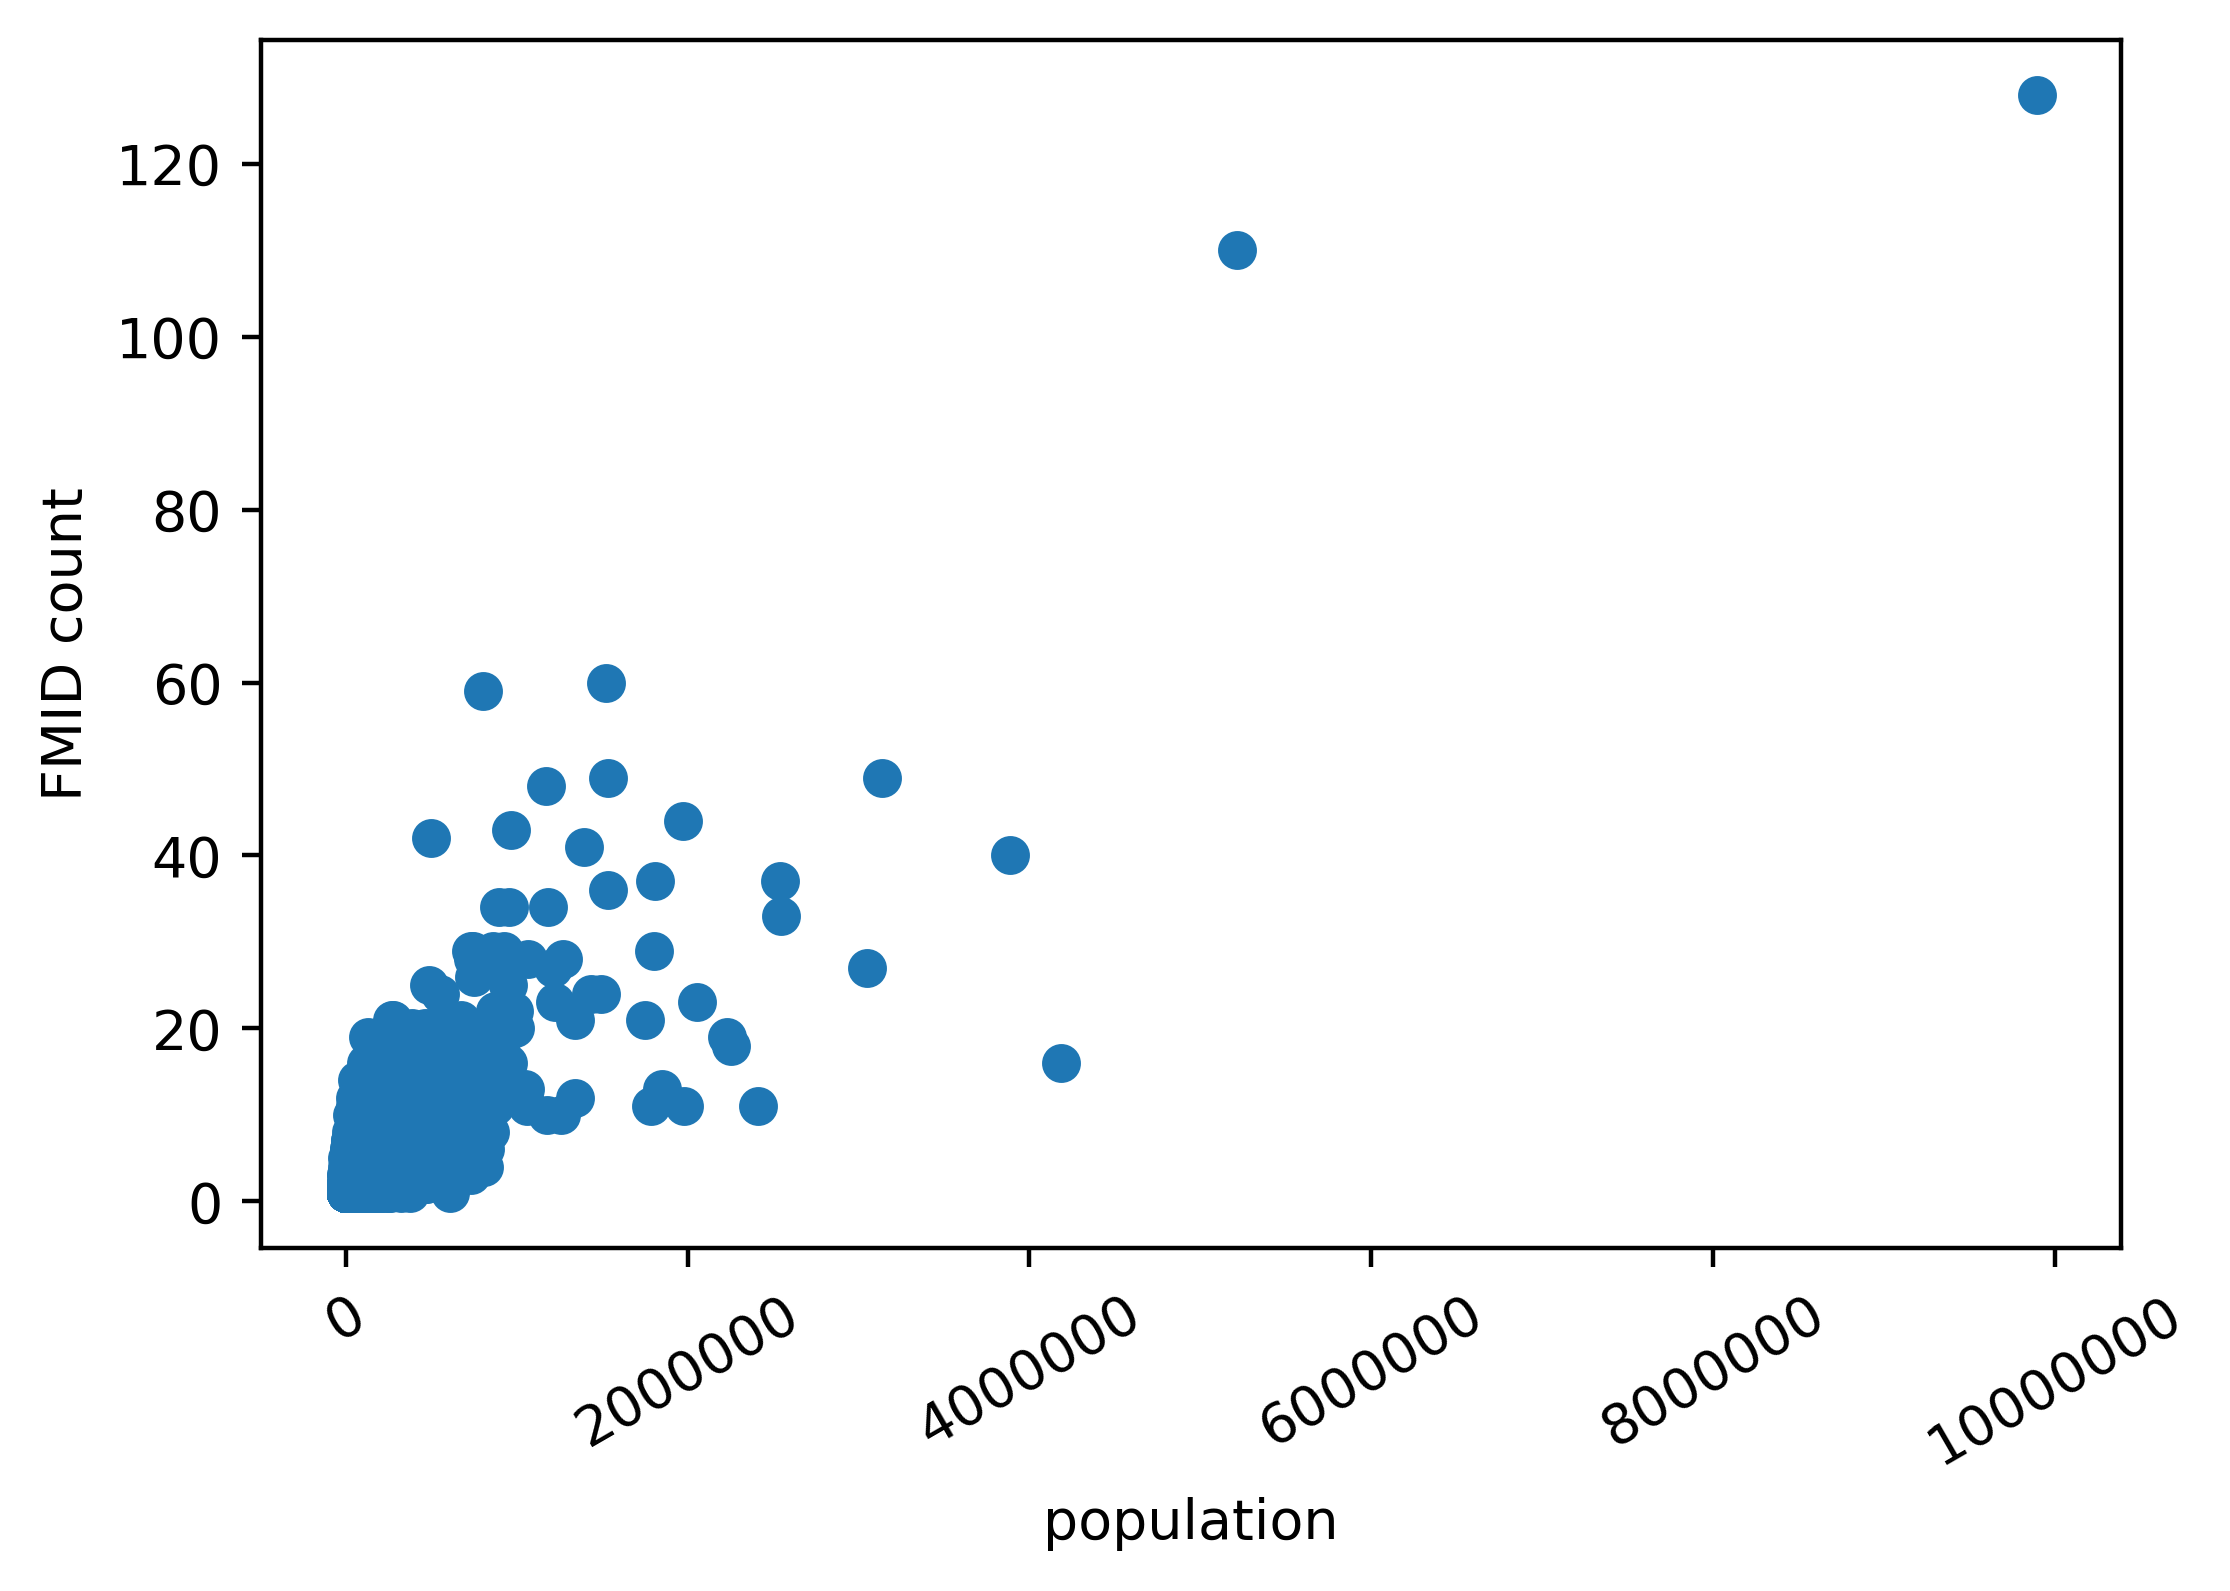

In [159]:
xp = co_group['population'].to_numpy()
yp = co_group['FMID_count'].to_numpy()
xp = xp.astype(np.float)

plt.scatter(xp, yp)
plt.xlabel('population')
plt.ylabel('FMID count')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

In [155]:
X = co_group[['population']]
y = co_group['FMID_count']
             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
             
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("The r-squared score for population predicting FMID counts is {}.".format(r2_score(y_test, y_test_preds)))

The r-squared score for population predicting FMID counts is 0.8088980696289725.


It seems there is a better relationship between population of county and the number of farmers markets in it.  This seems logical and expected.  

I wander if counties with higher incomes have farmers markets with more offerings.

In [170]:
# create dataframe from list of items offered at farmers markets
items = ['Bakedgoods', 'Cheese', 'Crafts', 'Flowers', 'Eggs', 'Seafood',
               'Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nuts', 'Plants',
               'Poultry', 'Soap', 'Trees', 'Wine', 'Coffee', 'Beans', 'Fruits',
               'Grains', 'Juices', 'Mushrooms', 'PetFood', 'Tofu', 'Organic', 
               'WildHarvested', 'Prepared', 'Nursery']
items_df = county_df[items]
items_df.head()

,Bakedgoods,Cheese,Crafts,Flowers,Eggs,Seafood,Herbs,Vegetables,Honey,Jams,...,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,Organic,WildHarvested,Prepared,Nursery
13,Y,N,Y,N,N,N,N,Y,Y,Y,...,Y,N,N,N,N,N,N,N,Y,N
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN
137,Y,N,N,N,Y,N,N,Y,Y,Y,...,Y,Y,N,N,N,N,N,N,N,N
272,Y,N,Y,Y,N,N,Y,Y,Y,Y,...,Y,N,N,N,N,N,-,N,Y,N
368,Y,N,N,Y,Y,N,Y,Y,N,Y,...,N,N,N,N,N,N,-,N,N,N


In [173]:
# tabulate counts of offerings in each farmers market
yes_item = items_df.apply(pd.Series.value_counts, axis=1).fillna(0)
yes_item.head()

,-,N,Y
13,0.0,22.0,8.0
86,1.0,0.0,0.0
137,0.0,22.0,8.0
272,1.0,18.0,11.0
368,1.0,22.0,7.0


In [187]:
# reduce to only counts of affirmative offerings
yes_df = yes_item['Y']
yes_df.head()

13      8.0
86      0.0
137     8.0
272    11.0
368     7.0
Name: Y, dtype: float64

In [193]:
income_df = county_df[income_feats]

In [191]:
# combine income and affirmative offerings columns
income_items = pd.concat([income_df, yes_df], axis=1)
income_items.head()

,per capita income,median household income,median family income,Y
13,23316.0,40948.0,52214.0,8.0
86,21924.0,41650.0,54725.0,0.0
137,26766.0,50221.0,60864.0,8.0
272,25020.0,48619.0,57858.0,11.0
368,20204.0,38013.0,47259.0,7.0


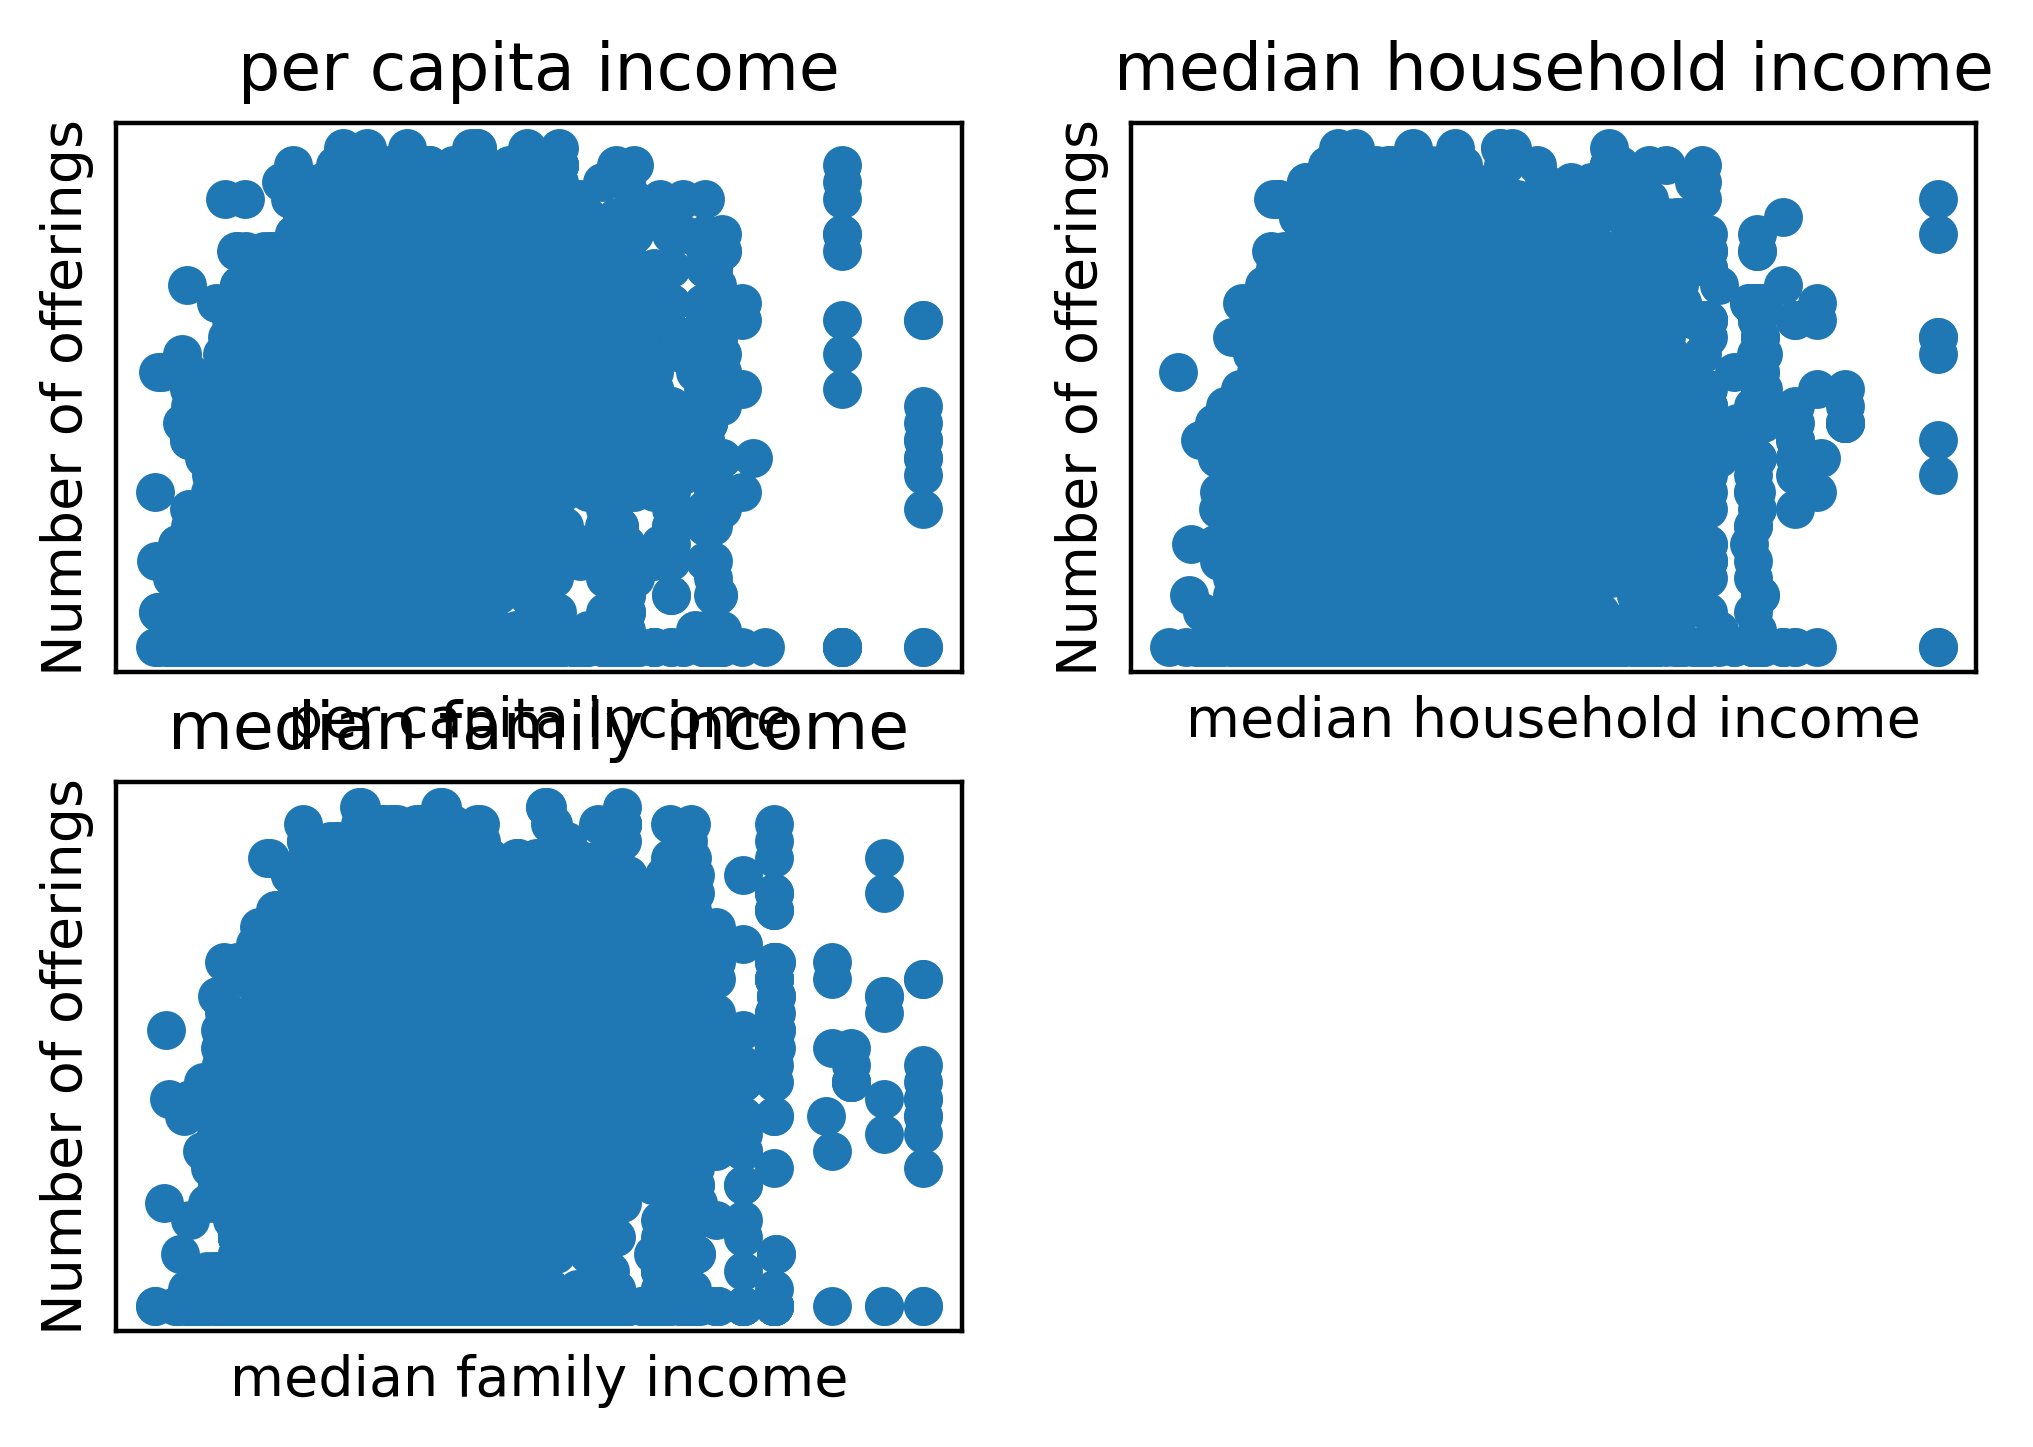

In [196]:
# plotting income vs count of item offerings
y_item = income_items['Y'].to_numpy()
x_item_1 = income_items['per capita income'].to_numpy()
x_item_2 = income_items['median household income'].to_numpy()
x_item_3 = income_items['median family income'].to_numpy()

subplot(2, 2, 1)
xticks([]), yticks([])
title('per capita income')
pci = plt.scatter(x_item_1, y_item)
plt.xlabel('per capita income')
plt.ylabel('Number of offerings')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 2)
xticks([]), yticks([])
title('median household income')
mhi = plt.scatter(x_item_2, y_item)
plt.xlabel('median household income')
plt.ylabel('Number of offerings')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 3)
xticks([]), yticks([])
title('median family income')
mfi = plt.scatter(x_item_3, y_item)
plt.xlabel('median family income')
plt.ylabel('Number of offerings')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

show()

In [198]:
X = income_items[['per capita income', 'median household income', 'median family income']]
y = income_items['Y']
             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
             
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("The r-squared score for income predicting item offering counts is {}.".format(r2_score(y_test, y_test_preds)))

The r-squared score for income predicting item offering counts is 0.01590581865492169.


It doesn't seem that income is a good predictor of the number of offerings at a farmers market.

Looking closer at offerings at each farmers market it seems they can be categorized into typical food staples and other, non-food or general categorized offerings or services.

In [213]:
food_feats = ['Bakedgoods', 'Cheese', 'Eggs', 'Seafood',
             'Herbs', 'Vegetables', 'Honey', 'Jams', 'Maple', 'Meat', 'Nuts',
             'Poultry', 'Beans', 'Fruits',
             'Grains', 'Juices', 'Mushrooms', 'Tofu', 'Wine', 'Coffee']
other_feats = ['Organic', 'WildHarvested', 'Prepared', 'Nursery', 'Crafts', 'Flowers',
                'Soap', 'Plants', 'Trees', 'PetFood']

foods = county_df[food_feats]
others = county_df[other_feats]

In [214]:
# tabulate counts of foods and others in each farmers market
yes_foods = foods.apply(pd.Series.value_counts, axis=1).fillna(0)
yes_others = others.apply(pd.Series.value_counts, axis=1).fillna(0)
yes_foods.head()
yes_others.head()

,-,N,Y
13,0.0,7.0,3.0
86,1.0,0.0,0.0
137,0.0,9.0,1.0
272,1.0,5.0,4.0
368,1.0,7.0,2.0


In [215]:
# reduce to only counts of affirmative offerings
food_count = yes_foods['Y']
other_count = yes_others['Y']

In [216]:
# combine income and affirmative offerings columns for foods
income_foods = pd.concat([income_df, food_count], axis=1)

# and for others
income_others = pd.concat([income_df, other_count], axis=1)

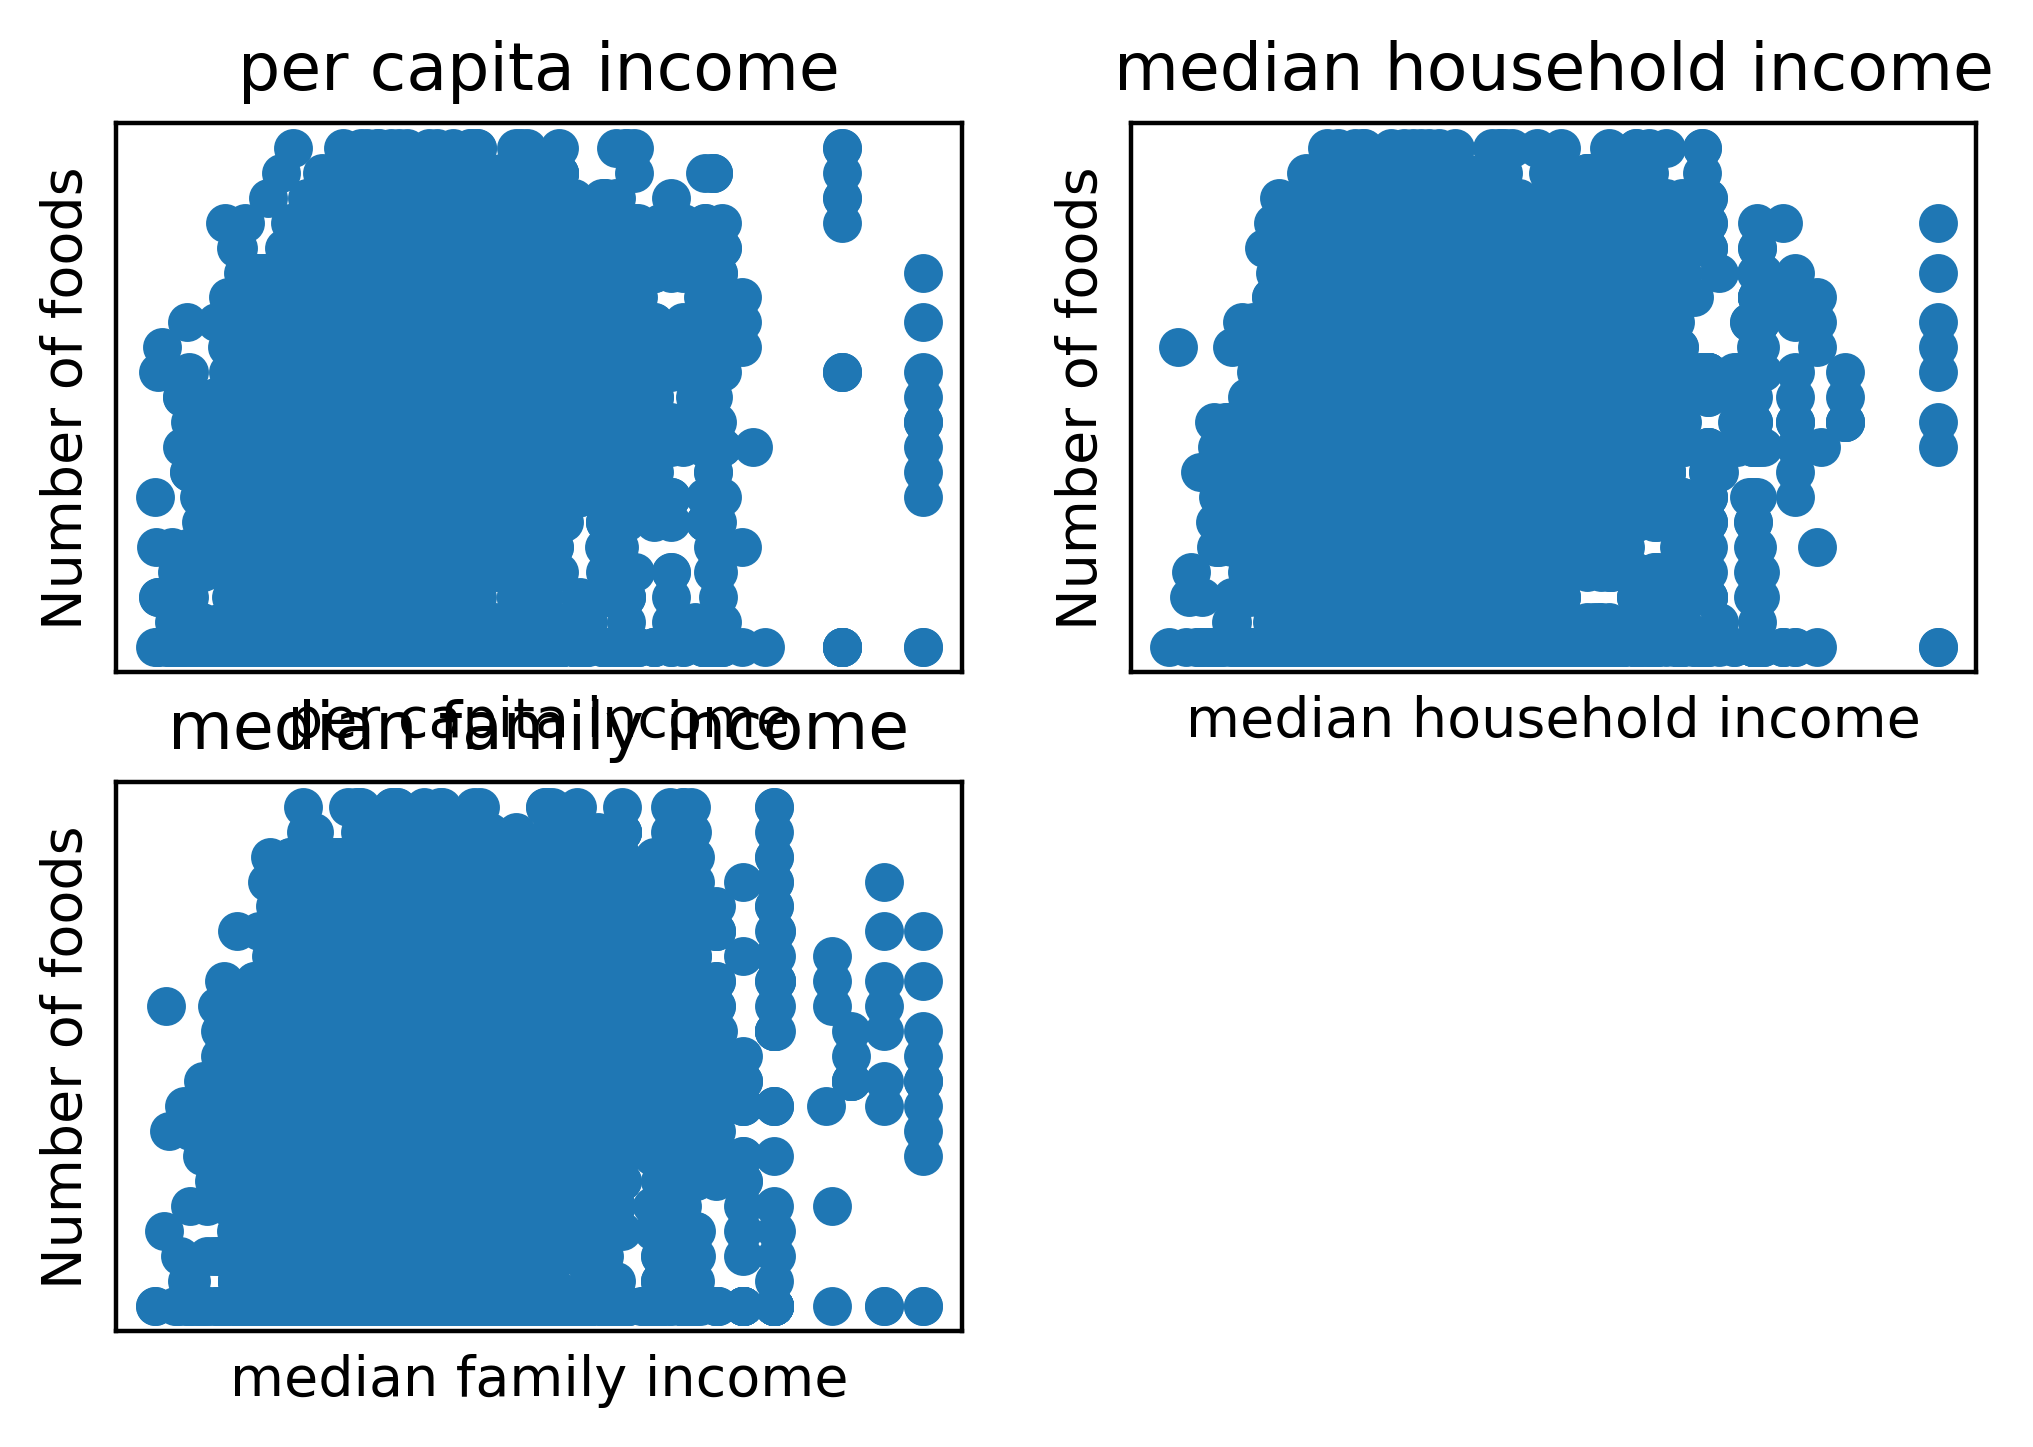

In [217]:
# plotting income vs count of food offerings
y_food = income_foods['Y'].to_numpy()
x_food_1 = income_foods['per capita income'].to_numpy()
x_food_2 = income_foods['median household income'].to_numpy()
x_food_3 = income_foods['median family income'].to_numpy()

subplot(2, 2, 1)
xticks([]), yticks([])
title('per capita income')
pci = plt.scatter(x_food_1, y_food)
plt.xlabel('per capita income')
plt.ylabel('Number of foods')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 2)
xticks([]), yticks([])
title('median household income')
mhi = plt.scatter(x_food_2, y_food)
plt.xlabel('median household income')
plt.ylabel('Number of foods')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 3)
xticks([]), yticks([])
title('median family income')
mfi = plt.scatter(x_food_3, y_food)
plt.xlabel('median family income')
plt.ylabel('Number of foods')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

show()

In [218]:
X = income_foods[['per capita income', 'median household income', 'median family income']]
y = income_foods['Y']
             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
             
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("The r-squared score for income predicting food offering counts is {}.".format(r2_score(y_test, y_test_preds)))

The r-squared score for income predicting food offering counts is 0.020948344814392672.


Considering only foods, it doesn't seem that income is a good predictor on number of food offerings.

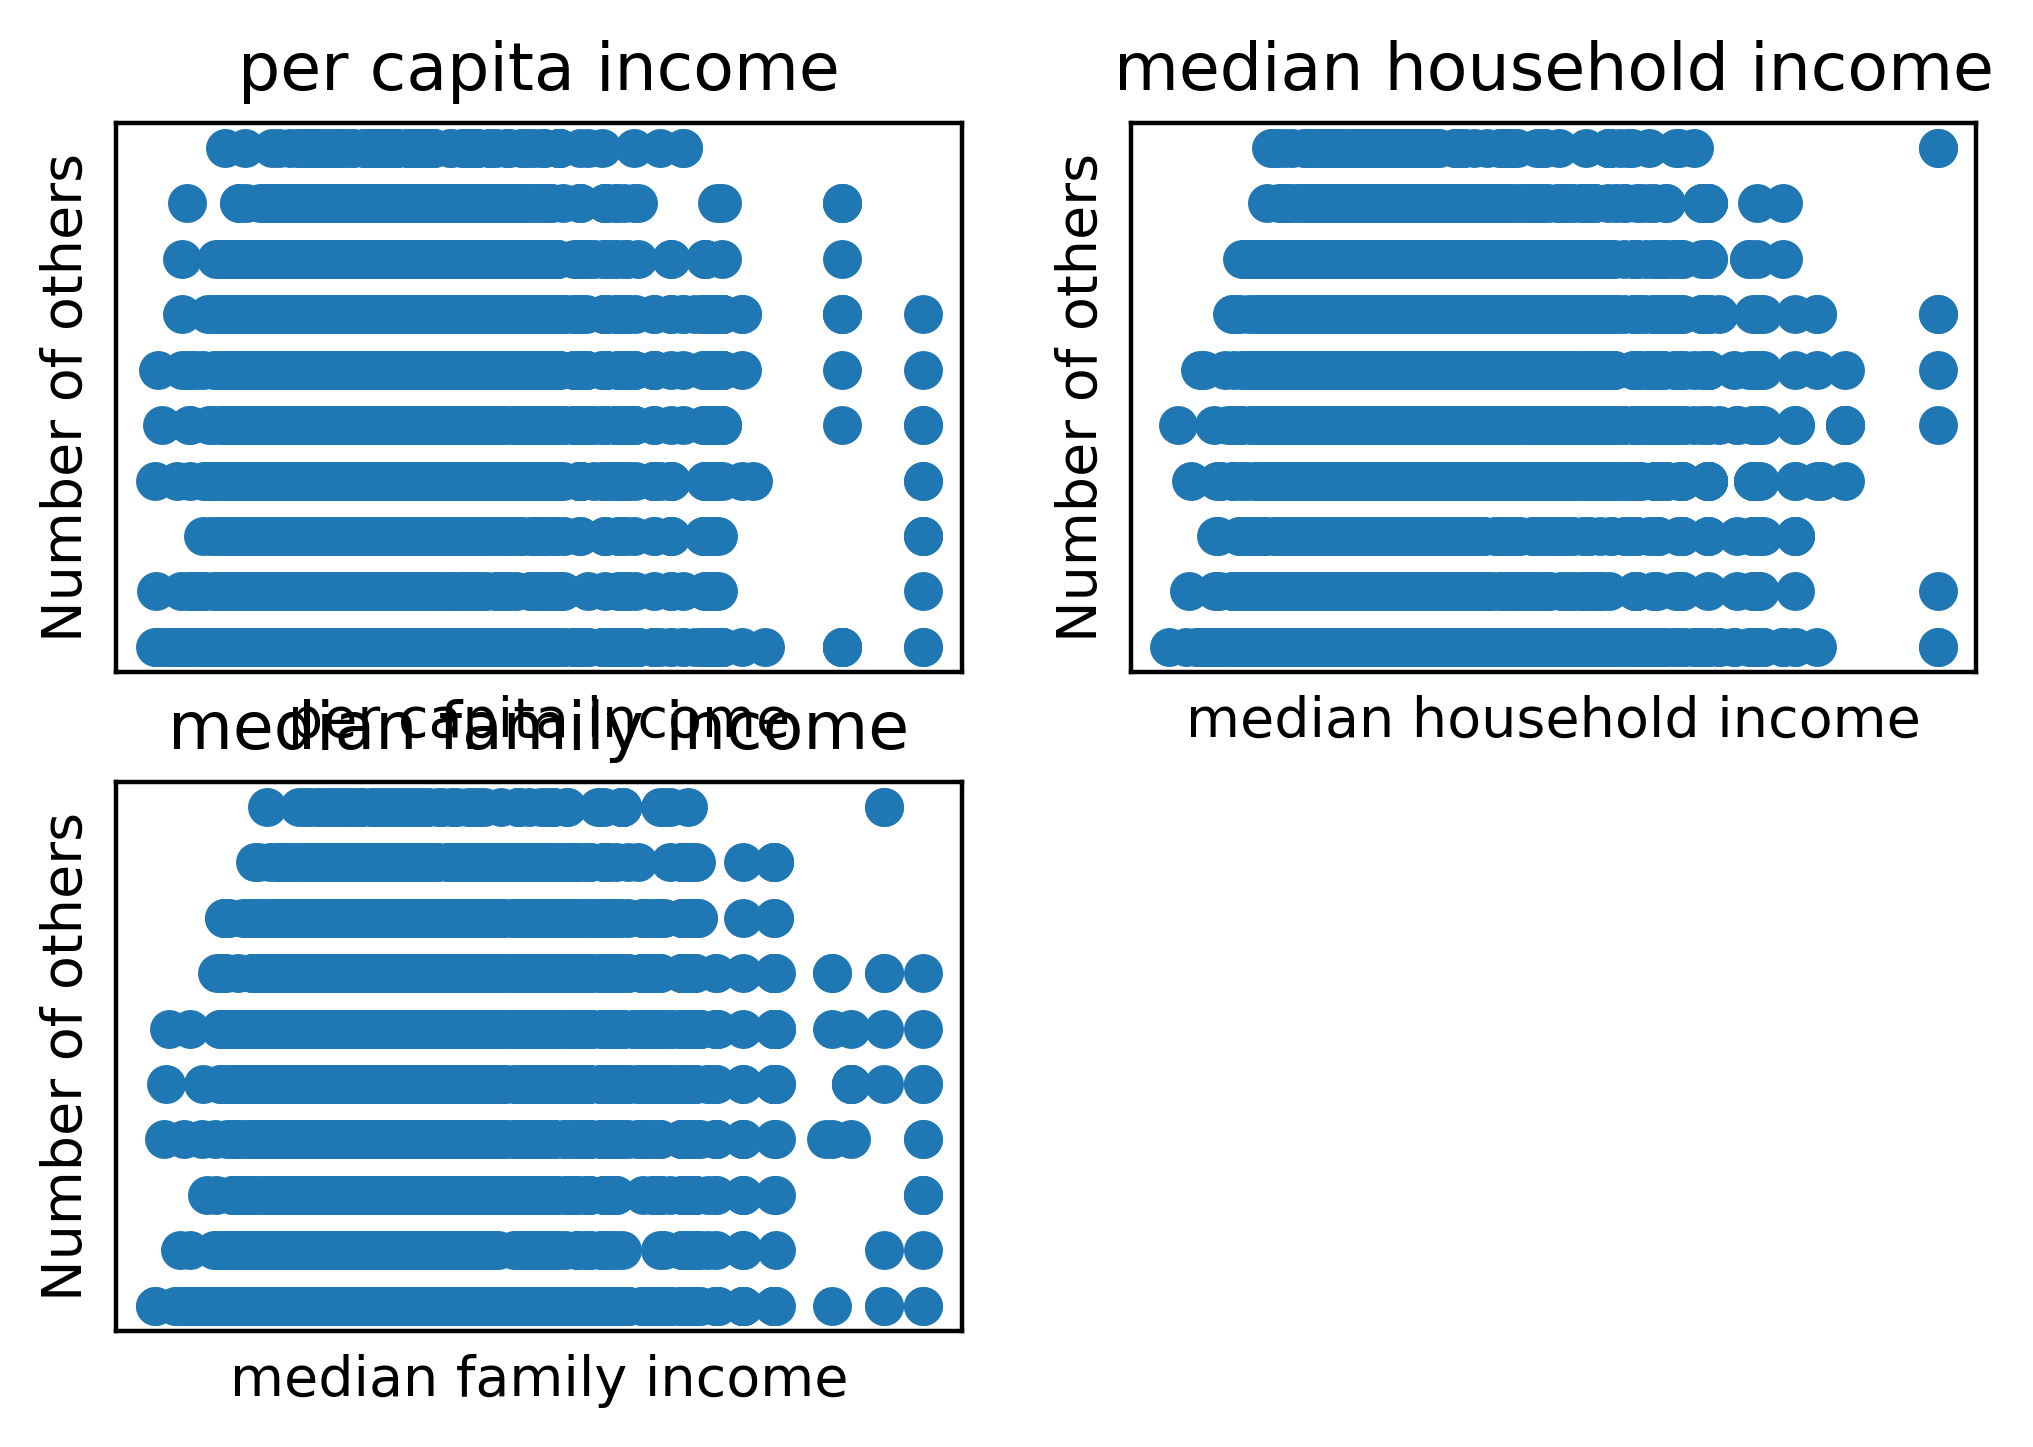

In [219]:
# plotting income vs count of other offerings
y_other = income_others['Y'].to_numpy()
x_other_1 = income_others['per capita income'].to_numpy()
x_other_2 = income_others['median household income'].to_numpy()
x_other_3 = income_others['median family income'].to_numpy()

subplot(2, 2, 1)
xticks([]), yticks([])
title('per capita income')
pci = plt.scatter(x_other_1, y_other)
plt.xlabel('per capita income')
plt.ylabel('Number of others')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 2)
xticks([]), yticks([])
title('median household income')
mhi = plt.scatter(x_other_2, y_other)
plt.xlabel('median household income')
plt.ylabel('Number of others')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

subplot(2, 2, 3)
xticks([]), yticks([])
title('median family income')
mfi = plt.scatter(x_other_3, y_other)
plt.xlabel('median family income')
plt.ylabel('Number of others')
plt.xticks(fontsize=10, rotation=30)
ticklabel_format(style='plain')

show()

In [220]:
X = income_others[['per capita income', 'median household income', 'median family income']]
y = income_others['Y']
             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
             
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

print("The r-squared score for income predicting other offering counts is {}.".format(r2_score(y_test, y_test_preds)))

The r-squared score for income predicting other offering counts is 0.0053134178937082055.


It seems that income is an even weaker predictor of non-food offerings or servics available at farmers markets.  This surprises me, because I would have thought that markets would cater more specialized services in affluent areas.  